In [0]:
import numpy as np
from scipy.io import loadmat
import scipy
from scipy.sparse import linalg
import matplotlib.pyplot as plt
from decimal import Decimal
import time
import matplotlib.pyplot as plt
import random

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Image reconstruction in X-ray tomography

## 1 X-ray tomography

$\underline{\textbf{Q1.}}$ We start by loading the matrix $H$ and the image matrix $\bar{x}$

In [0]:
path = 'gdrive/My Drive/MVA/Large_Scale_Optim/'

In [0]:
x = loadmat(path + "data/x.mat")['x']
H = loadmat(path + "data/H.mat")['H']
G = loadmat(path + "data/H.mat")['H']

$\underline{\textbf{Q2.}}$ Let's Construct y using such that:
$$y = H\bar{x} + \omega $$
where $\omega \in \mathbb{R}^{M}$ is an i.i.d Gaussian noise with variance $\sigma^{2}$

In [0]:
M = H.shape[0]
N = x.shape[0]

sigma = 1
lamb = 0.13
delta = 0.02

w = np.random.normal(scale = sigma, size=(M,1))
y = H*x+w

$\underline{\textbf{Q3.}}$ Let's visualize the image $\bar{x}$, and a 2D version of $y$

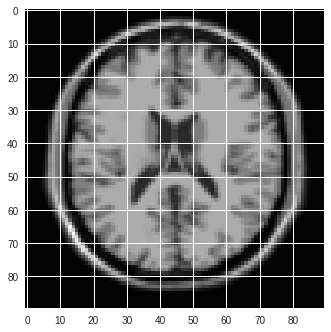

In [6]:
plt.imshow(x.reshape(90,90).T,cmap = 'gray')

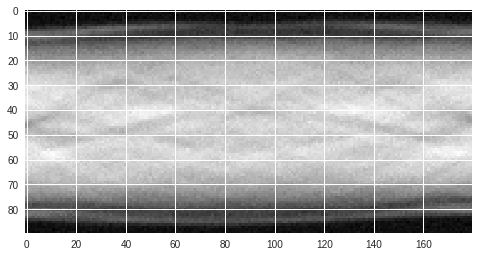

In [7]:
plt.imshow(y.reshape(180,90).T,cmap = 'gray')

## 2 Optimization problem

In [0]:
def f(x,y,G,H,lamb,delta):
    return 0.5*np.linalg.norm(H*x - y)**2 + lamb*r(x,delta,G) 

def grad_f(x,y,G,H,lamb,delta):
    return H.T*(H*x - y) + lamb * grad_r(x,delta,G)

def r(x,delta,G):
    return float(np.sum(psi(G*x,delta),axis=0))

def grad_r(x,delta,G):
    return G.T*psi_prime(G*x,delta)

def psi(u,delta):
    return np.sqrt(1+np.power(u,2)/delta**2)

def psi_prime(u,delta):
    return u/(delta**2 * psi(u,delta))
  
def psi_second(u,delta):
    return 1/(delta**2 * psi(u,delta))

def omega(u,dela):
    return psi_prime(u,delta)/u


def SNR(x_hat,x):
    return 10 * np.log10(np.linalg.norm(x)**2/np.linalg.norm(x-x_hat)**2)


$\underline{\textbf{Q2.}}$ Let be $x \in \mathbb{R}^{N}$, and let's compute $\nabla f(x)$

$$\nabla f(x) = H^{T}(Hx - y) + \lambda \nabla r(x) = H^{T}(Hx - y)  + G^{T}\Psi'(Gx)$$
Where $\Psi'(Gx) = \left(\Psi'([Gx]^{n})\right)_{1\leq n \leq 2N}$

$\underline{\textbf{Q3.}}$ Let's show that $\nabla f $ is $L$-Lipshitz with $L = \left\| H\right\|^{2} + \frac{\lambda}{\delta^{2}}\left\|G\right\|^{2}$. 

We know that $\forall x_1,x_2 \in \mathbb{R}^{N}$ $$\left\|\nabla f(x_1) - \nabla f(x_2)\right\| \leq \underset{\mathbb{R}^{N}}{\text{sup}}\left\|\nabla^{2}f\right\| . \left\|x_1-x_2\right\|$$ 

A simple computation show that, $\forall x \in \mathbb{R}^{N}$

$$\nabla^{2}f(x) = H^{T}H + \lambda G^{T}.\text{Diag}\left(\Psi''(Gx)\right).G$$

And since $\forall u \in \mathbb{R}$,  $\Psi''(u) = \frac{1}{\delta^{2}\sqrt{1+\frac{u^{2}}{\delta^{2}}}}\left( 1 - \frac{1}{\delta^2 + u^2}\right)$ . $\forall x \in \mathbb{R}^{N}$, $\left\|\nabla^{2} f(x)\right\| \leq \left\|H\right\|^{2} + \frac{\lambda}{\delta^2}\left\|G\right\|^{2}$

Therfore $\nabla f$ is $L$-lipshitz

In [9]:
L = scipy.sparse.linalg.norm(H)**2 + delta/lamb**2 * scipy.sparse.linalg.norm(G)**2
print('L = {}'.format(L))

L = 1718873.069607413


## 3. Optimization algorithms

### 3.1. Gradient descent algorithm 

$\underline{\textbf{Q1.}}$ We create first $x_{0} \in \mathbb{R}^{N}$ a vector with all entries equal to 0. This will be our initialization for all tested algorithms

In [0]:
x0 = np.zeros((N,1))

$\underline{\textbf{Q2.}}$ We implement now a gradient descent algorithm to minimize $f$.

Iteration 0, objective: 6.73E+6, 449456.6737871748
Iteration 100, objective: 1.50E+6, 182039.04341087557
Iteration 200, objective: 5.86E+5, 79022.39070182257
Iteration 300, objective: 3.96E+5, 39921.16259796744
Iteration 400, objective: 3.38E+5, 25770.974483137743
Iteration 500, objective: 3.08E+5, 19946.788105116197
Iteration 600, objective: 2.89E+5, 16615.63312838213
Iteration 700, objective: 2.75E+5, 14206.792693872087
Iteration 800, objective: 2.65E+5, 12305.919000007556
Iteration 900, objective: 2.57E+5, 10764.130924066136
Iteration 1000, objective: 2.51E+5, 9499.71850268474

Signal to Noise Ratio: 10.144336900058338


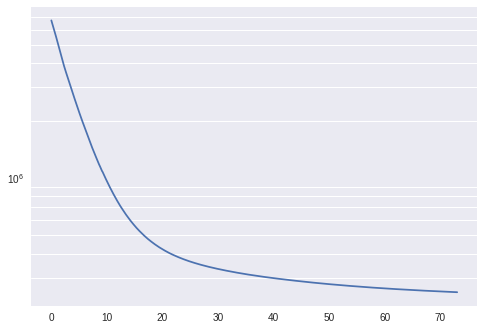

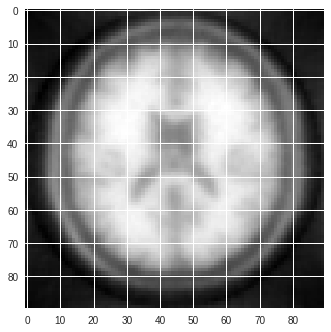

In [11]:
def gradient_descent(f,grad_f,x0,L,N,y,G,H,lamb,delta):
    gamma = 1/L
    grad = N*1e-4
    x = x0
    it = 0
    itermax = 1000 #5000
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax: 
        
        t1 = time.time()
        gradient = grad_f(x,y,G,H,lamb,delta)
        x = x - gamma*gradient
        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%100 == 0:
            print("Iteration {}, objective: {:.2E}, {}".format(it,Decimal(criterion),grad))          
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        it += 1
    return x,objectives,times
        
x_hat,objectives,times = gradient_descent(f,grad_f,x0,L,N,y,G,H,0.01,delta)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')

### 3.2. MM quadratic algorithm

$\underline{\textbf{Q1.}}$We define $$A(x) = H^{T}H +  \frac{1}{\lambda}G^{T}\omega(x)G$$
Where $\omega(x) = \left( \frac{\psi'\left([Gx]^{(n)}\right)}{[Gx]^{n}}\right)_{0\leq n\leq 2N}$

Then a quadratic majorant function of $f$ is given by $$h(x,y) = f(y) + \left\langle \nabla f(y) | x-y \right\rangle + \frac{1}{2}\left\|x-y\right\|^{2}_{A(y)}$$ 



In [0]:
from scipy.sparse.linalg import LinearOperator
from scipy.sparse import diags


def A(x):
    x = np.squeeze(x)
    di = diags(np.power(1+G*x**2/delta**2, -0.5)).tocsc()
    def mult_vect(y):
        return H.T.dot(H.dot(y)) + lamb/delta**2 * G.T.dot(di.dot(G.dot(y)))
    return LinearOperator((N, N), matvec=mult_vect, rmatvec=mult_vect)

In [0]:
A(0*x)*0*grad

$\underline{\textbf{Q2.}}$ We propose basic MM algorithm with $\theta_{n} = 1$ to to minimize $f$
$$x_{n+1} = x_{n}  - \theta_{n}A(x_{n})^{-1}\nabla f(x_{n})$$

In [70]:
def MM_quadratic(f,grad_f,invA,x0,L,N,y,G,H,lamb,delta):
    grad = N*1e-4
    x = x0
    it = 0
    itermax = 1000
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax:         
        t1 = time.time()
        
        gradient = grad_f(x,y,G,H,lamb,delta)
        temp , info = scipy.sparse.linalg.bicg(A(x),gradient)
        x = x - 0.5*temp.reshape(-1,1)
        
        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%1 == 0:
            print("Iteration {}, objective: {:.2E}, {}, {}".format(it,Decimal(criterion),grad,0.5*np.linalg.norm(H*x - y)**2))        
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        it += 1
    return x,objectives,times


x_hat,objectives,times = MM_quadratic(f,grad_f,A,x0,L,N,y,G,H,lamb,delta)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')

Iteration 0, objective: 6.82E+6, 449439.34615161543, 6818220.810819428
Iteration 1, objective: 6.79E+6, 365428.3775925932, 6780330.419854177
Iteration 2, objective: 6.70E+6, 357245.4182461794, 6670835.672219684
Iteration 3, objective: 6.43E+6, 351813.10664705734, 6336736.141482607
Iteration 4, objective: 5.74E+6, 339995.64931896917, 5469950.502557507


KeyboardInterrupt: ignored

### 3.3. 3MG  algorithm

In [0]:
def MMMG(f,grad_f,A,x0,L,N,y,G,H,lamb,delta,HH):
    gamma = 1/L
    grad = N*1e-4
    x = x0
    it = 0
    itermax = 10
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax: 
        t1 = time.time()
        gradient = grad_f(x,y,G,H,lamb,delta)
        if it == 0:
            D = - gradient
        else:
            D = np.concatenate((-gradient,diff),axis=1)
        
        temp = np.dot(np.dot(D.T,A(x,G,HH,lamb,delta)),D)
        u = - np.dot(np.linalg.pinv(temp),np.dot(D.T,gradient))
        x = x + np.dot(D,u)
        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%1 == 0:
            print("Iteration {}, objective: {:.2E}, {}".format(it,Decimal(criterion),grad))        
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        diff = np.dot(D,u)
        it += 1
    return x,objectives,times
        
x_hat,objectives,times = MMMG(f,grad_f,A,x0,L,N,y,G,H,lamb,delta,HH)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')

## 3.4 Block-coordinate MM quadratic algorithm

In [0]:
def MM_block(f,grad_f,invA,x0,L,N,y,G,H,lamb,delta,J,Nj):
    grad = N*1e-4
    x = x0
    it = 0
    itermax = 10
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax:   
        j = it%J + 1
        
        t1 = time.time()
        gradient = grad_f(x,y,G,H,lamb,delta)[Nj*(j-1):J*Nj+1]
        

        x[Nj*(j-1):J*Nj+1] = x[Nj*(j-1):J*Nj+1] - np.linalg.solve(A(x,G,H,lamb,delta)[Nj*(j-1):J*Nj+1,Nj*(j-1):J*Nj+1],gradient)
        
        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%1 == 0:
            print("Iteration {}, objective: {:.2E}, {}, {}".format(it,Decimal(criterion),grad,0.5*np.linalg.norm(H*x - y)**2))        
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        it += 1
    return x,objectives,times
        
x_hat,objectives,times = MM_block(f,grad_f,A,x0,L,N,y,G,H,lamb,delta,2,N//2)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')

### 3.5.  Parallel MM quadratic algorithm

In [0]:
def MM_parallel(f,grad_f,invA,x0,L,N,y,G,H,lamb,delta):
    grad = N*1e-4
    x = x0
    it = 0
    itermax = 10
    objectives = []
    times = [0]
    
    while grad > np.sqrt(N)*1e-4 and it <= itermax:   
        j = it%J + 1
        
        t1 = time.time()
        gradient = grad_f(x,y,G,H,lamb,delta)[Nj*(j-1):J*Nj+1]
        
        #x = x - 1.99*np.dot(invA,gradient)
        #x = x - 1*scipy.sparse.linalg.bicg(A(x,y,G,H,lamb,delta),gradient)
        x[Nj*(j-1):J*Nj+1] = x[Nj*(j-1):J*Nj+1] - 1.99*np.linalg.solve(A(x,G,H,lamb,delta)[Nj*(j-1):J*Nj+1,Nj*(j-1):J*Nj+1],gradient)
        #x = x - 1.99*np.linalg.lstsq(A(x,y,G,H,lamb,delta),gradient,rcond=None)
        grad = np.linalg.norm(gradient)
        criterion = f(x,y,G,H,lamb,delta)        
        objectives.append(criterion)
        
        if it%1 == 0:
            print("Iteration {}, objective: {:.2E}, {}, {}".format(it,Decimal(criterion),grad,0.5*np.linalg.norm(H*x - y)**2))        
        t2 = time.time()
        times.append(times[-1]+t2-t1)
        it += 1
    return x,objectives,times
        
x_hat,objectives,times = MM_parallel(f,grad_f,A,x0,L,N,y,G,H,lamb,delta)
plt.figure()
plt.semilogy(times[1:],objectives)
plt.grid(which='both')
print('\nSignal to Noise Ratio:',SNR(x_hat,x))
plt.figure()
plt.imshow(x_hat.reshape(90,90).T,cmap = 'gray')